In [2]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  mean_absolute_error

In [4]:
data=pd.read_csv('btc.csv',sep=';').set_index('Date')

In [5]:
data.sample(5)

,Price
Date,
12.04.2018,7904.330275
26.08.2018,6689.869333
13.09.2019,10345.338747
25.06.2019,11726.263831
24.09.2019,8613.671249


In [6]:
price=data.Price

In [7]:
len(price)

591

In [81]:
#metoda shift i prognoza naiwna

In [22]:
def NaivePredcition(TS,lag):
    target=TS.shift(lag)[lag:]
    prediction=TS[lag:]
    MAE=mean_absolute_error(target,prediction)
    MSE=mean_squared_error(target,prediction)
    MAPE=np.mean((target-prediction)/target)
    return {'MAE':MAE,'MSE':MSE,'MAPE':MAPE}

In [26]:
NaivePredcition(price,1)

{'MAE': 637.4745608814482,
 'MSE': 795676.4224279955,
 'MAPE': -0.012077525454273963}

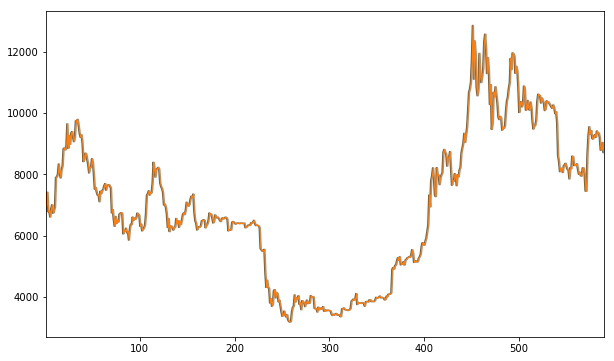

In [99]:
plt.figure(figsize=(10,6))
price[1:].plot()
price.shift(1)[1:].plot()
plt.show()

In [77]:
#obiekt TimeSeriesSplit

In [57]:
TSS=TimeSeriesSplit(n_splits=50)

In [58]:
def TimeSeriesCV(TSS,TS):
    CV_results=[]
    for train_index, test_index in TSS.split(price):
        train_len=len(train_index)
        test_len=len(test_index)
    
        prediction_value=TS[train_index][-1]
        prediction_vector=np.repeat(prediction_value,len(test_index))
        MAE=mean_absolute_error(price[test_index],prediction_vector)
        MSE=mean_squared_error(price[test_index],prediction_vector)
        MAPE=np.mean((prediction_vector-price[test_index])/price[test_index])
    
        CV_results.append({'train_len':train_len,'test_len':test_len,'MAE':MAE,'MSE':MSE,'MAPE':MAPE})
    
        plt.figure(figsize=(10,6));
        price[test_index].reset_index().plot()
        pd.Series(prediction_vector).plot()
        plt.show()
    return CV_results

<Figure size 720x432 with 0 Axes>

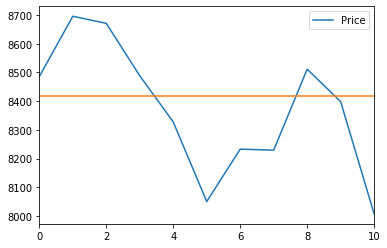

<Figure size 720x432 with 0 Axes>

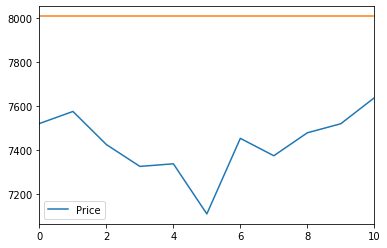

<Figure size 720x432 with 0 Axes>

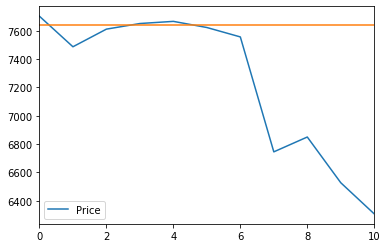

<Figure size 720x432 with 0 Axes>

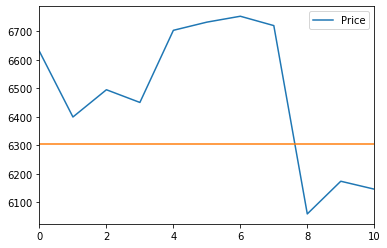

<Figure size 720x432 with 0 Axes>

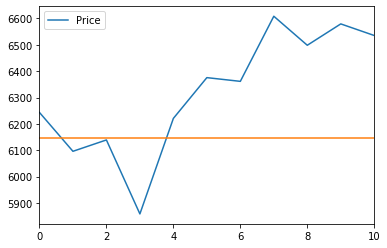

<Figure size 720x432 with 0 Axes>

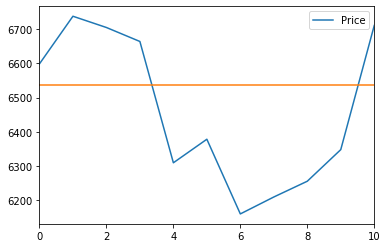

<Figure size 720x432 with 0 Axes>

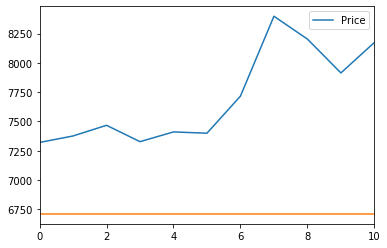

<Figure size 720x432 with 0 Axes>

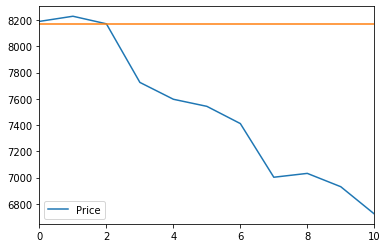

<Figure size 720x432 with 0 Axes>

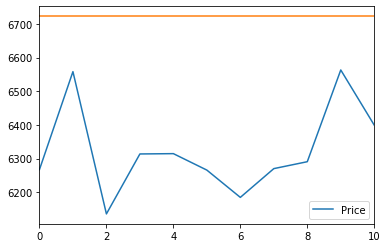

<Figure size 720x432 with 0 Axes>

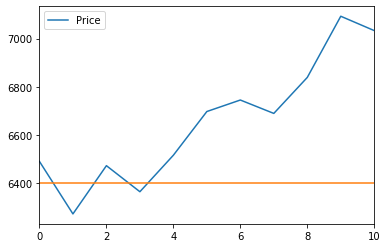

<Figure size 720x432 with 0 Axes>

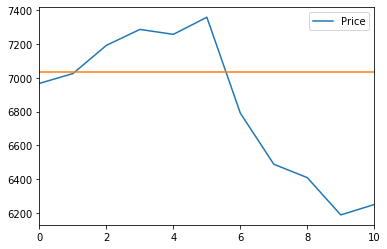

<Figure size 720x432 with 0 Axes>

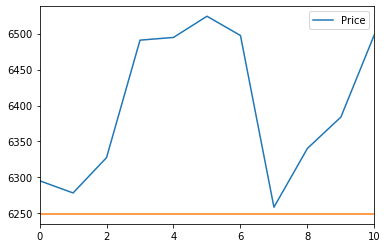

<Figure size 720x432 with 0 Axes>

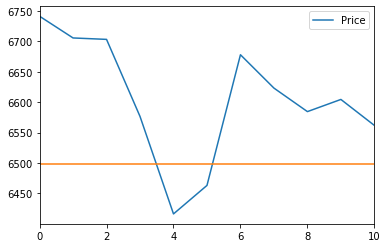

<Figure size 720x432 with 0 Axes>

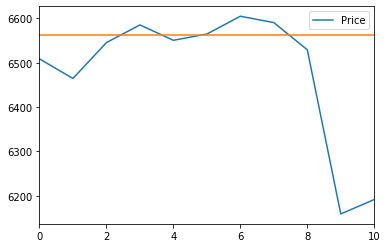

<Figure size 720x432 with 0 Axes>

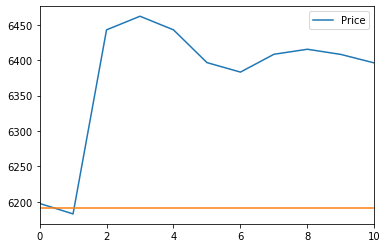

<Figure size 720x432 with 0 Axes>

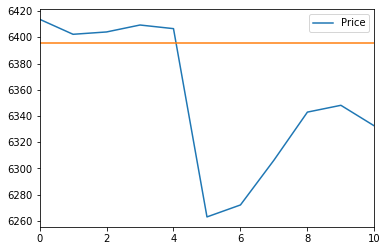

<Figure size 720x432 with 0 Axes>

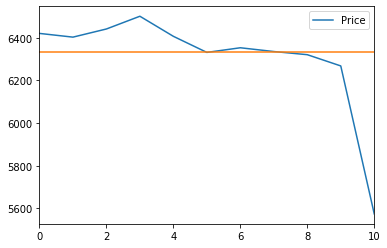

<Figure size 720x432 with 0 Axes>

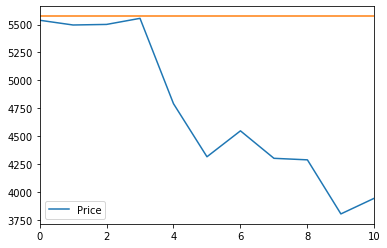

<Figure size 720x432 with 0 Axes>

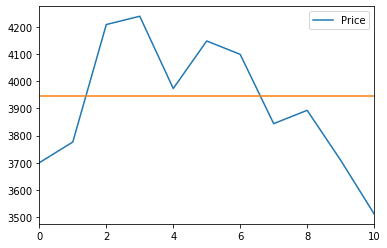

<Figure size 720x432 with 0 Axes>

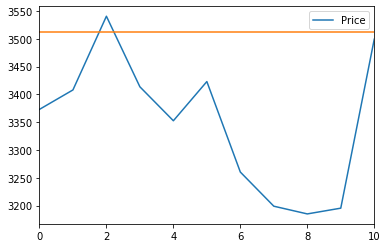

<Figure size 720x432 with 0 Axes>

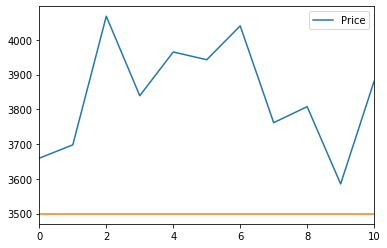

<Figure size 720x432 with 0 Axes>

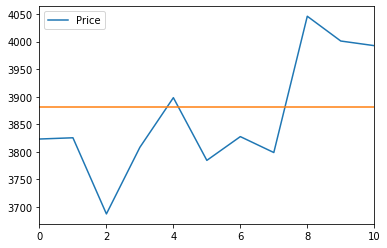

<Figure size 720x432 with 0 Axes>

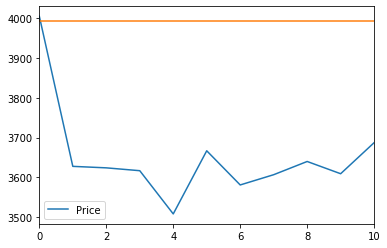

<Figure size 720x432 with 0 Axes>

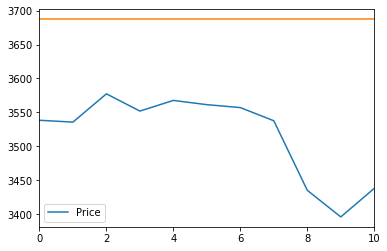

<Figure size 720x432 with 0 Axes>

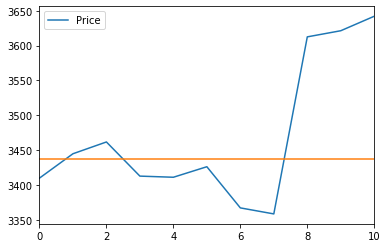

<Figure size 720x432 with 0 Axes>

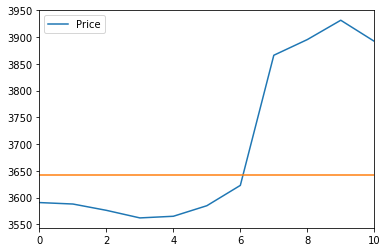

<Figure size 720x432 with 0 Axes>

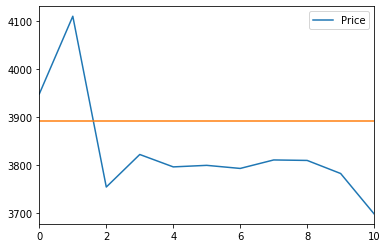

<Figure size 720x432 with 0 Axes>

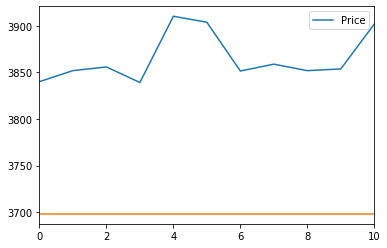

<Figure size 720x432 with 0 Axes>

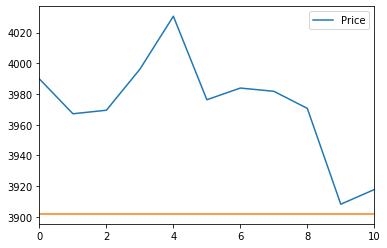

<Figure size 720x432 with 0 Axes>

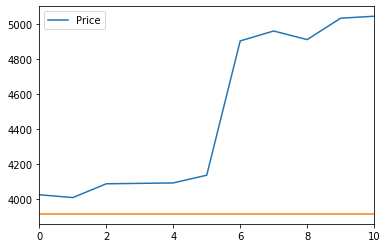

<Figure size 720x432 with 0 Axes>

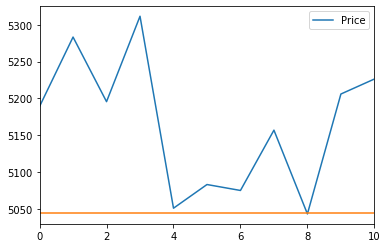

<Figure size 720x432 with 0 Axes>

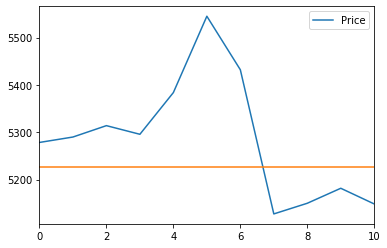

<Figure size 720x432 with 0 Axes>

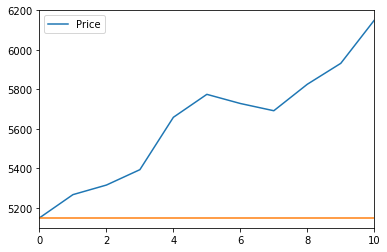

<Figure size 720x432 with 0 Axes>

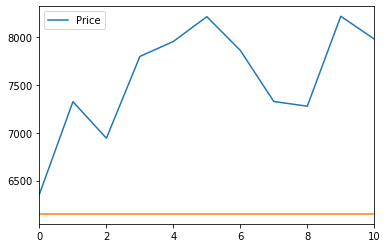

<Figure size 720x432 with 0 Axes>

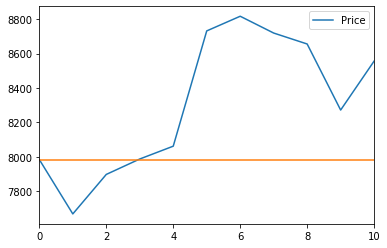

<Figure size 720x432 with 0 Axes>

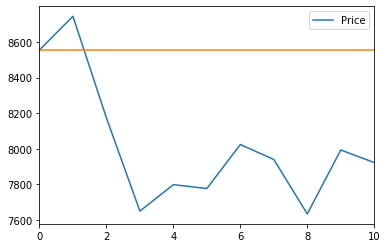

<Figure size 720x432 with 0 Axes>

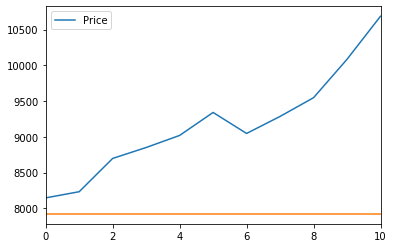

<Figure size 720x432 with 0 Axes>

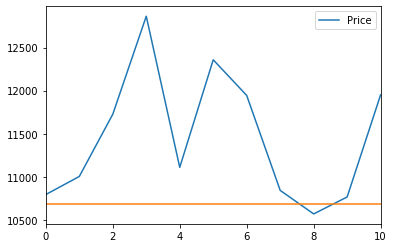

<Figure size 720x432 with 0 Axes>

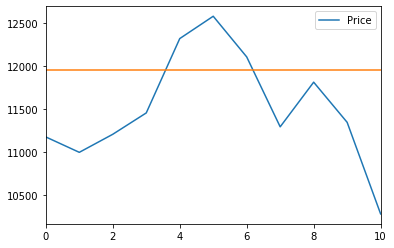

<Figure size 720x432 with 0 Axes>

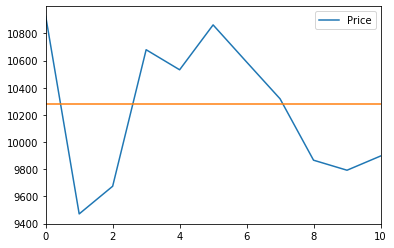

<Figure size 720x432 with 0 Axes>

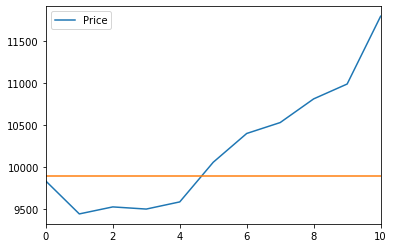

<Figure size 720x432 with 0 Axes>

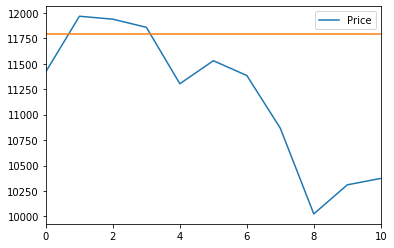

<Figure size 720x432 with 0 Axes>

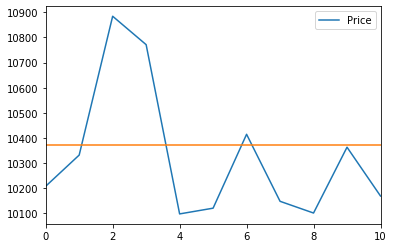

<Figure size 720x432 with 0 Axes>

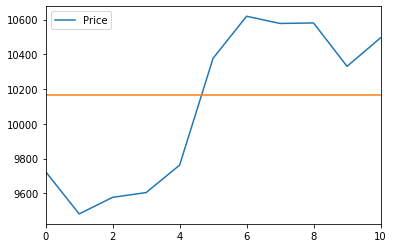

<Figure size 720x432 with 0 Axes>

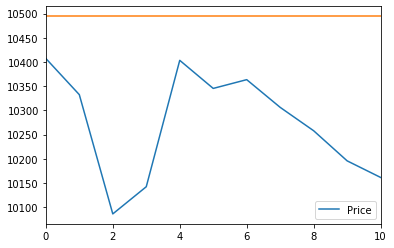

<Figure size 720x432 with 0 Axes>

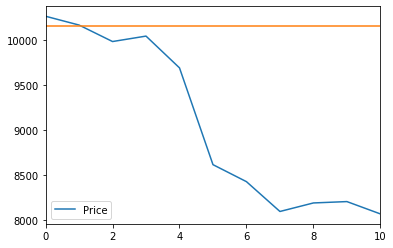

<Figure size 720x432 with 0 Axes>

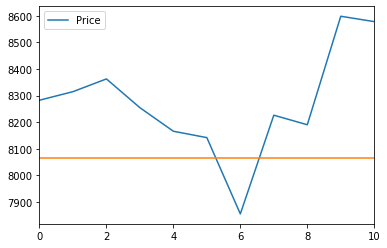

<Figure size 720x432 with 0 Axes>

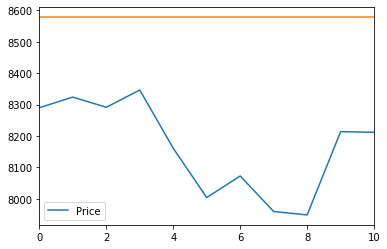

<Figure size 720x432 with 0 Axes>

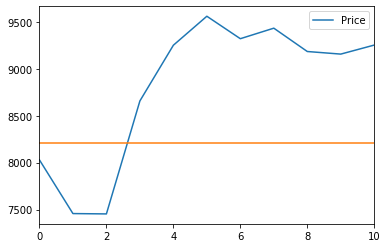

<Figure size 720x432 with 0 Axes>

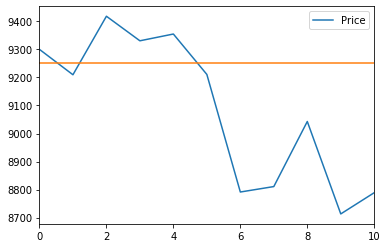

In [59]:
CV_results=TimeSeriesCV(TSS,price)

In [64]:
pd.DataFrame(CV_results).apply(np.mean,axis=0)

train_len       310.500000
test_len         11.000000
MAE             398.255362
MSE          361376.966138
MAPE             -0.000069
dtype: float64

# Zadanie: 
Sprawdź czy lepszą predykcję otrzymamy, licząc średnią z ostatnich kilku dni